<a href="https://colab.research.google.com/github/WahyuSugianto14/AOL---Software-Engineering-GeniusInetractify/blob/main/RM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from nltk.util import pr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [79]:
!pip install nltk # Install nltk if you haven't already
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   #for data visualization and graphical plotting
from matplotlib import style      #for styling the plot
style.use("ggplot")

import nltk
from nltk.util import pr
from nltk.tokenize import word_tokenize      #to divide strings into lists of substrings
from nltk.stem import WordNetLemmatizer      #to link words with similar meanings to one word.
from nltk.corpus import stopwords            #to filterout useless data
stopword = set(stopwords.words('english'))

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import re
import string

In [7]:
import nltk

# Install the NLTK library if it's not already installed
# !pip install nltk

# Download the WordNet corpus
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
import nltk

# Set the NLTK data path if required
nltk.data.path.append('/path/to/nltk_data')


In [10]:
import os

nltk_data_path = '/usr/share/nltk_data/corpora/wordnet'
if os.path.exists(nltk_data_path):
    print("WordNet corpus is available.")
else:
    print("WordNet corpus is missing.")


WordNet corpus is missing.


In [9]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
import nltk
import os

# Download WordNet corpus
nltk.download('wordnet')

# Verify the path
nltk_data_path = '/usr/share/nltk_data/corpora/wordnet'
if not os.path.exists(nltk_data_path):
    print("WordNet corpus is missing. Please check the download or path.")
else:
    print("WordNet corpus is available.")

# Load the WordNet corpus
from nltk.corpus import wordnet as wn

# Example usage of WordNet
synsets = wn.synsets('dog')
print(synsets)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


WordNet corpus is missing. Please check the download or path.
[Synset('dog.n.01'), Synset('frump.n.01'), Synset('dog.n.03'), Synset('cad.n.01'), Synset('frank.n.02'), Synset('pawl.n.01'), Synset('andiron.n.01'), Synset('chase.v.01')]


In [13]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [14]:
data = pd.read_csv("/content/labeled_data.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   labels  24783 non-null  object
dtypes: object(2)
memory usage: 387.4+ KB


In [16]:
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [17]:
data.shape

(24783, 7)

In [18]:
data["labels"] = data["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and Offensive"})
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet                 labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language  


In [19]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [67]:
print(data["tweet"].iloc[0],"\n")
print(data["tweet"].iloc[1],"\n")
print(data["tweet"].iloc[2],"\n")
print(data["tweet"].iloc[3],"\n")
print(data["tweet"].iloc[4],"\n")

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!! 

!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit 

!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny 

!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361; 



In [21]:
data = data[["tweet", "labels"]]
data.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [81]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r"\@w+|\#",'',text)
    text = re.sub(r"[^\w\s]",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    tweet_tokens = word_tokenize(text)
    filtered_tweets=[w for w in tweet_tokens if not w in stopword] #removing stopwords
    return " ".join(filtered_tweets)

In [82]:
data.tweet=data['tweet'].apply(clean)

In [83]:
tweetData = data.drop_duplicates("tweet")

In [84]:
# to see updated number of columns as duplicates entries are removed
tweetData.shape

(24506, 2)

In [85]:
tweetData.isnull().sum()

tweet     0
labels    0
dtype: int64

In [86]:
lemmatizer=WordNetLemmatizer()
def lemmatizing(data):
    tweet=[lemmatizer.lemmatize(word) for word in data]
    return data

In [87]:
#lemmatizing the processed data
tweetData.loc[:, 'tweet']=tweetData['tweet'].apply(lambda x: lemmatizing(x))

In [88]:
# to see the data after pre-processing
print(tweetData["tweet"].iloc[0],"\n")
print(tweetData["tweet"].iloc[1],"\n")
print(tweetData["tweet"].iloc[2],"\n")
print(tweetData["tweet"].iloc[3],"\n")
print(tweetData["tweet"].iloc[4],"\n")

rt mayasolovely woman shouldnt complain cleaning house amp man always take trash 

rt boy dats coldtyga dwn bad cuffin dat hoe place 

rt urkindofbrand dawg rt ever fuck bitch start cry confused shit 

rt cganderson vivabased look like tranny 

rt shenikaroberts shit hear might true might faker bitch told ya 



In [89]:
# to see distribution of labels
tweetData['labels'].value_counts()

labels
Offensive Language       18984
No Hate and Offensive     4113
Hate Speech               1409
Name: count, dtype: int64

<ipython-input-40-a1b3cba941b3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


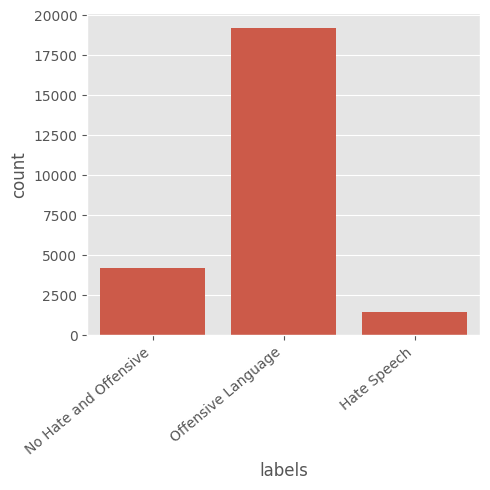

In [40]:
# to visualize the data using a count plot
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(x='labels', data=tweetData)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

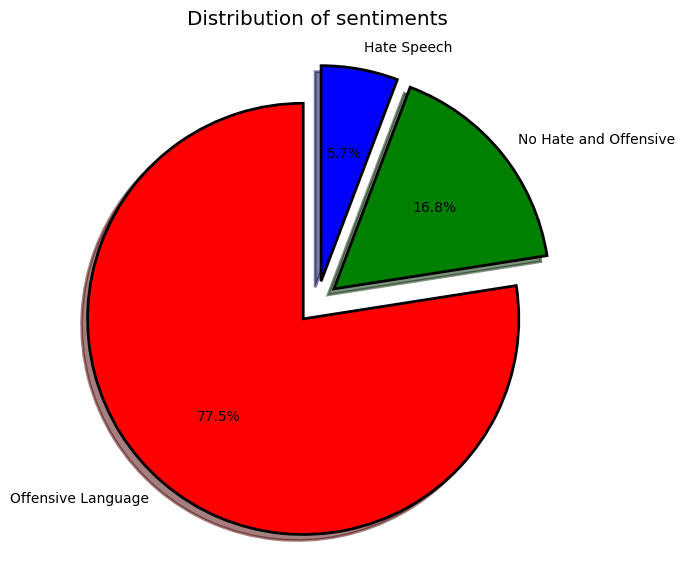

In [90]:
# visualizing data using piechart
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':2, "edgecolor":'black'}
tags = tweetData['labels'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of sentiments")

In [91]:
# visualizing non-hate tweets
non_hate_tweets = tweetData[tweetData.labels=='No Hate and Offensive']
non_hate_tweets.head()

,tweet,labels
0,rt mayasolovely woman shouldnt complain cleani...,No Hate and Offensive
40,momma said pussy cats inside doghouse,No Hate and Offensive
63,simplyaddictedtoguys woof woof hot scally lad,No Hate and Offensive
66,allaboutmanfeet woof woof hot soles,No Hate and Offensive
67,allyhaaaaa lemmie eat oreo amp dishes one oreo...,No Hate and Offensive


In [44]:
non_hate_tweets.value_counts()

tweet                                                                                                                                                              labels               
!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...                       No Hate and Offensive    1
RT @MaxAbrahms: When Americans claim #ISIS is just a "local threat," reply: You mean just to Iraq, Syria, Turkey, Jordan, Saudi Arabia, Leb&#8230;                 No Hate and Offensive    1
RT @McNarstle: ...and rounding out our CNN Ebola panel tonight, the monkey from the 1995 film, OUTBREAK.                                                           No Hate and Offensive    1
RT @McNarstle: @CzickenShack I go on Drudge Report every day now hoping to see a story about your tranny army                                                      No Hate and Offensive    1
RT @McNarstle: And she's watchin' him with those eyes /

<ipython-input-98-1f71ca0dad46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetData['tweet_length'] = tweetData['tweet'].apply(len)


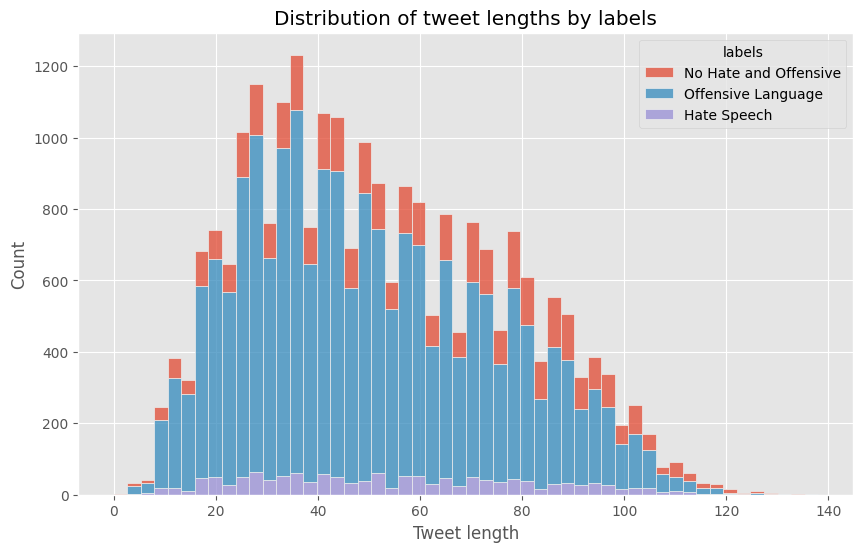

In [98]:
tweetData['tweet_length'] = tweetData['tweet'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=tweetData, x='tweet_length', hue='labels', multiple='stack')
plt.title('Distribution of tweet lengths by labels')
plt.xlabel('Tweet length')
plt.ylabel('Count')
plt.show()

In [99]:
# visualizing non-hate tweets
non_hate_tweets = tweetData[tweetData.labels=='No Hate and Offensive']
non_hate_tweets.head()

,tweet,labels,tweet_length
0,rt mayasolovely woman shouldnt complain cleani...,No Hate and Offensive,80
40,momma said pussy cats inside doghouse,No Hate and Offensive,37
63,simplyaddictedtoguys woof woof hot scally lad,No Hate and Offensive,45
66,allaboutmanfeet woof woof hot soles,No Hate and Offensive,35
67,allyhaaaaa lemmie eat oreo amp dishes one oreo...,No Hate and Offensive,50


In [100]:


non_hate_tweets.value_counts()



tweet                                                                                                           labels                 tweet_length
                                                                                                                No Hate and Offensive  0               1
rt joleendoreen kik group called party line old charlie barber always hogging calls                             No Hate and Offensive  83              1
rt kickin trash cans golf cart yeeyee jbilinovich                                                               No Hate and Offensive  49              1
rt kickman giants pitiful jetspitiful mets pitiful yankeespitiful nets pitiful knickspitiful ny sports pitiful  No Hate and Offensive  110             1
rt kid listened nas showed new perspective coming ghetto like pimp c                                            No Hate and Offensive  68              1
                                                                                       

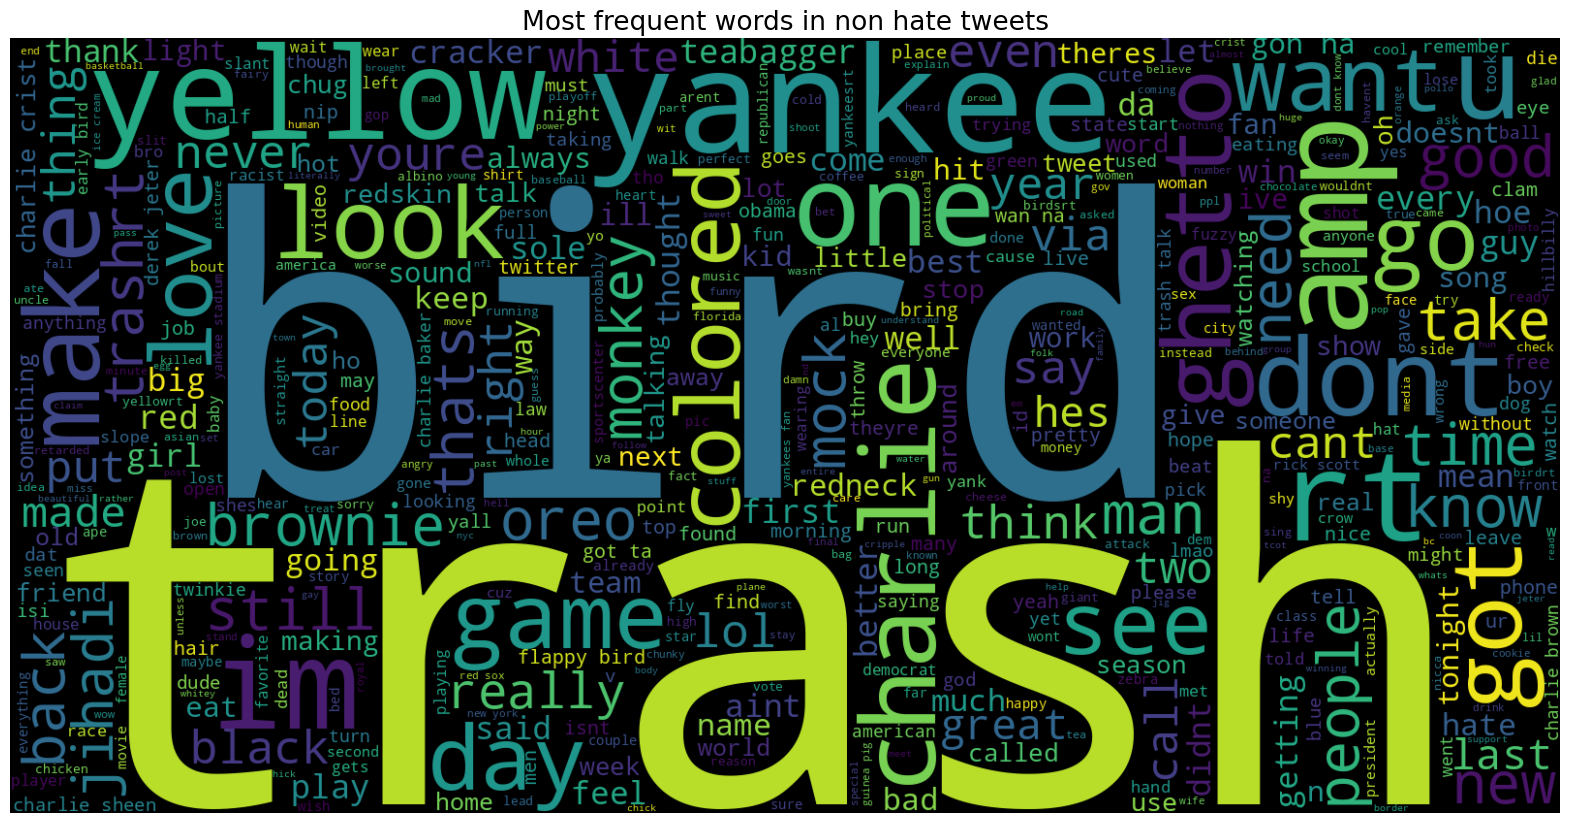

In [101]:


# visualizing non-hate tweets using word cloud
text=''.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in non hate tweets", fontsize=19)
plt.show()



In [103]:
TF-IDF = TF(t,d) * IDF(t),
where TF(t,d) = number of times term "t" appears in a document "d".
      IDF(t) = inverse document frequency of the term t

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (<ipython-input-103-0057d3a72a06>, line 1)

In [48]:
#vectorizing the text data using TfidVectorizer and create a bigram lanuage model
vect=TfidfVectorizer(ngram_range=(1,2)).fit(tweetData['tweet'])

In [49]:
feature_names=vect.get_feature_names_out()
print("Number of features: {}\n", format(len(feature_names)))
print("First 200 features: \n", format(feature_names[:20]))

Number of features: {}
 208234
First 200 features: 
 ['00' '00 bet' '00 burg' '00 lives' '00 pm' '000' '000 000' '000 128514'
 '000 8230' '000 birds' '000 bitches' '000 deaths' '000 dinner'
 '000 dollars' '000 elixer' '000 florida' '000 followers' '000 from'
 '000 neworleans' '000 person']


In [50]:
tweetData.shape

(24783, 2)

In [51]:
#creating a trigram language model
vect=TfidfVectorizer(ngram_range=(1,3)).fit(tweetData['tweet'])

In [52]:
feature_names=vect.get_feature_names_out()
print("Number of features: {}\n", format(len(feature_names)))
print("First 200 features: \n", format(feature_names[:20]))

Number of features: {}
 465959
First 200 features: 
 ['00' '00 bet' '00 bet its' '00 burg' '00 burg mall' '00 lives'
 '00 lives with' '00 pm' '00 pm eastern' '00 pm to' '00 pm today' '000'
 '000 000' '000 000 8230' '000 128514' '000 128514 128514' '000 8230'
 '000 birds' '000 birds year' '000 bitches']


In [53]:
tweetData.shape

(24783, 2)

In [54]:
#separating the data into x and y to build the model
X = tweetData['tweet']
Y = tweetData['labels']
X = vect.transform(X) #transforming the x data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [56]:
#printing the size of training and testing data
print("Size of X_train", (X_train.shape))
print("Size of Y_train", (Y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of Y_test", (Y_test.shape))

Size of X_train (19826,)
Size of Y_train (19826,)
Size of X_test (4957,)
Size of Y_test (4957,)


In [108]:
#separating the data into x and y to build the model
X = tweetData['tweet']
Y = tweetData['labels']
X = vect.transform(X) #transforming the x data

# Split the data after transforming X
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#for training the data on logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train) #loading x_train and y_train data on model
logreg_predict = logreg.predict(X_test) #predicting the value for test data
logreg_acc = accuracy_score(logreg_predict, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
print("Test accuracy: {:.2f}%".format(logreg_acc*100)) #printing accuracy of the model

Test accuracy: 87.39%


In [110]:
#printing classification report
print(classification_report(Y_test, logreg_predict))

                       precision    recall  f1-score   support

          Hate Speech       0.56      0.05      0.09       283
No Hate and Offensive       0.87      0.66      0.75       808
   Offensive Language       0.88      0.98      0.93      3811

             accuracy                           0.87      4902
            macro avg       0.77      0.56      0.59      4902
         weighted avg       0.86      0.87      0.85      4902



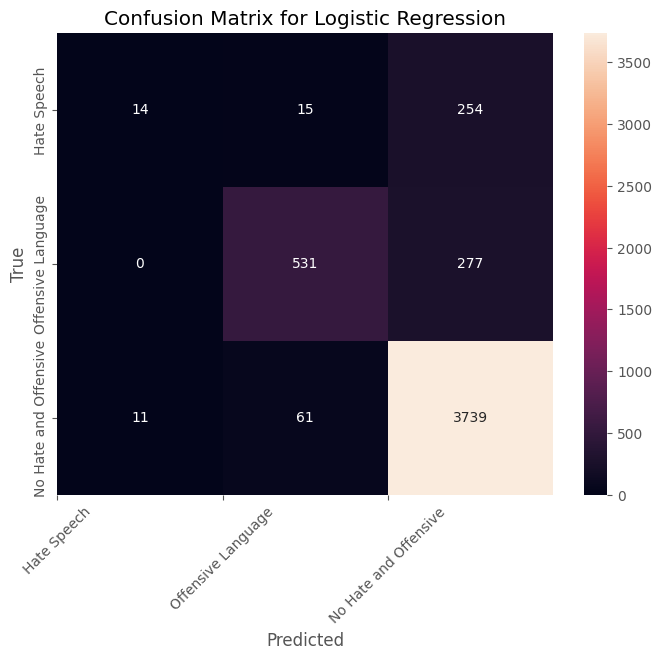

In [111]:
# Confusion matrix
cm = confusion_matrix(Y_test, logreg_predict)

# Define labels for the axes
labels = ['Hate Speech', 'Offensive Language', 'No Hate and Offensive']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression")
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=45)
plt.show()

In [113]:
#for performing hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train, Y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

In [ ]:
# prompt: apply svm

from sklearn.svm import SVC

# Instantiate the SVM classifier
svm = SVC()

# Fit the model to the training data
svm.fit(X_train, Y_train)

# Predict on the test data
svm_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, svm_pred)
print("Test accuracy:", accuracy)